# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercise 2 </span>
Luca Maria Colombo Gomez - Matr: 934049

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. Sampling a uniform distribution in $[0,1]$
2. Using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

In [35]:
# Include libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

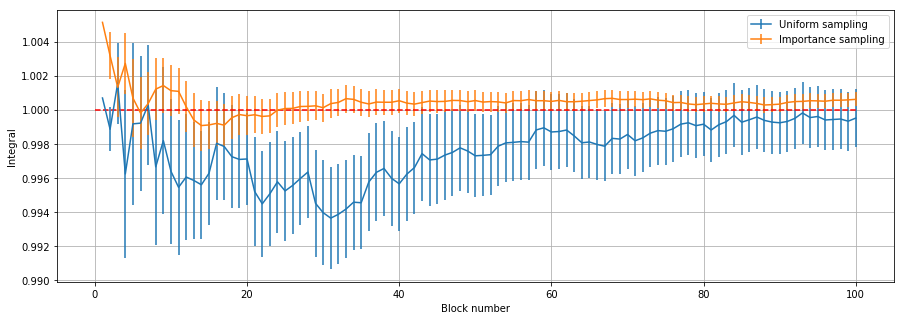

In [36]:
xu, yu, erru = np.loadtxt("2.1/data/uniform.out", usecols=(0,1,2), delimiter=' ', unpack='true')
xi, yi, erri = np.loadtxt("2.1/data/importance.out", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(15,5))

plt.errorbar(xu,yu,yerr=erru, label = 'Uniform sampling')
plt.errorbar(xi,yi,yerr=erri, label = 'Importance sampling')
plt.legend()
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Block number')
plt.ylabel('Integral')
plt.grid(True)

plt.show()

### Exercise 02.2
Repeat the simulation of a random walk in 3D always starting at the origin:

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$


In [37]:
from scipy.optimize import curve_fit

# define fitting function
def diffusive(x,k):  
    return k * np.sqrt(x)

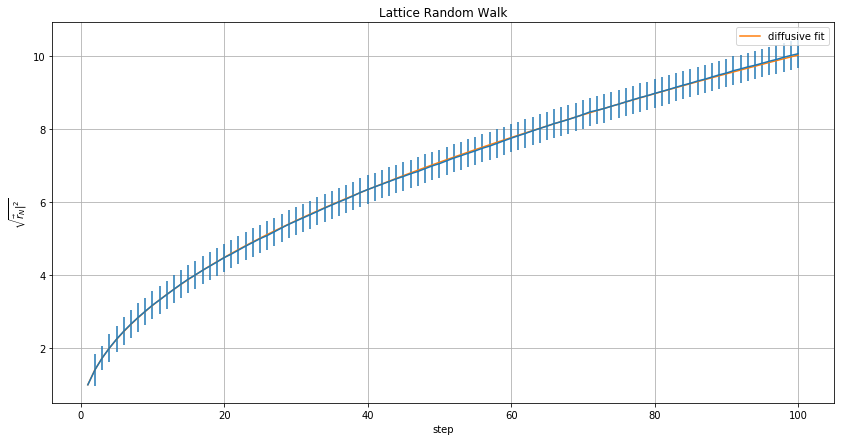

Fit parameter k = 1.00e+00 +- 2.57e-04


In [38]:
x, y, err = np.loadtxt("2.2/data/lattice.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err)
plt.plot(x,y_fit, label='diffusive fit')
plt.title("Lattice Random Walk")
plt.xlabel('step')
plt.ylabel(r'$\sqrt{\vec{r}_N|^2 }$')
plt.legend()
plt.grid(True)
plt.show()

print('Fit parameter k = ' +  "{:.2e}".format(p_opt[0]) + ' +- ' + "{:.2e}".format(np.sqrt(p_cov[0][0])))


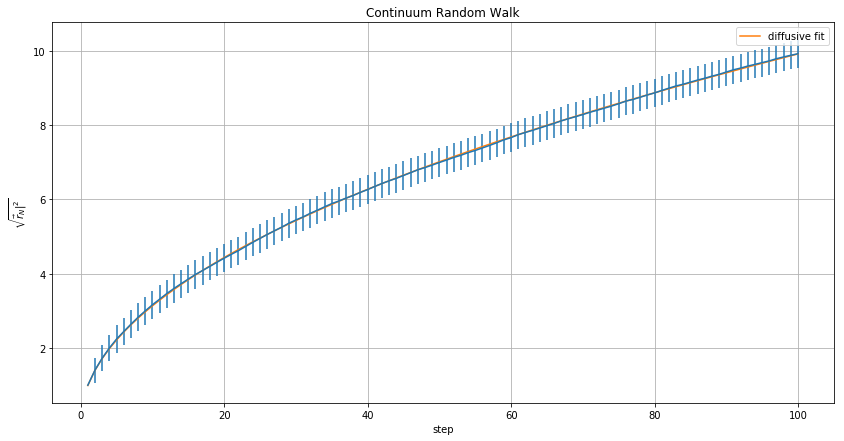

Fit parameter k = 9.91e-01 +- 2.39e-04


In [39]:
x, y, err = np.loadtxt("2.2/data/continuum.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err)
plt.plot(x,y_fit, label='diffusive fit')
plt.title("Continuum Random Walk")
plt.xlabel('step')
plt.ylabel(r'$\sqrt{\vec{r}_N|^2 }$')
plt.legend()
plt.grid(True)
plt.show()

print('Fit parameter k = ' +  "{:.2e}".format(p_opt[0]) + ' +- ' + "{:.2e}".format(np.sqrt(p_cov[0][0])))



Both the random walks are perfectly fitted with a diffusive fit. 